# Praca domowa nr 3

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from warnings import filterwarnings
filterwarnings('ignore')

## Wczytanie danych

In [2]:
data = pd.read_csv("australia.csv")

In [3]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


## Podział danych na zbiór treningowy i testowy

In [4]:
X = data.drop("RainTomorrow", axis = 1)
y = data.RainTomorrow

Sprawdzimy jak często występuje wartość "1" w kolumnie RainTomorrow

In [5]:
y.value_counts(normalize = True)

0    0.779741
1    0.220259
Name: RainTomorrow, dtype: float64

Widać, że rozkład wartości nie jest równomierny, dlatego zastosowanie różnych miar ma duże uzasadnienie. Częściej występującą wartością jest 0, dlatego samo używanie accuracy może prowadzić do złego wyboru modelu.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators = 400, max_depth = 7, min_samples_split = 3,
                                  max_features = 4, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_split=3,
                       n_estimators=400, random_state=0)

In [8]:
#  Stworzymy generującą różne oceny jakości, aby móc jej używać także do następnych klasyfikatów 

def report(classifier, X, y):
    y_pred = classifier.predict(X)
    report = classification_report(y, y_pred, output_dict = True)
    scores = {}
    scores['accuracy'] = report['accuracy']
    scores['precision'] = report['macro avg']['precision']  # bierzemy średnią z precision dla wartości '0' i '1'
    scores['recall'] = report['macro avg']['recall']
    scores['f1-score'] = report['macro avg']['f1-score']
    return scores

In [9]:
#  Ponadto, tworzymy słownik, w którym zawrzemy wszystkie scores uzyskane przez wybrane klasyfikatory

scores = {}
scores['rf'] = report(rf, X_test, y_test)

Możemy podejrzeć uzyskane wartości:

In [10]:
for k, v in scores['rf'].items():
    n = 15 - len(k)
    print(f'{k}: {v*100 : {n}.2f}')

accuracy:   84.99
precision:  81.58
recall:     71.31
f1-score:   74.46


Dodatkowo stworzymy confusion matrix dla naszego klasyfikatora:

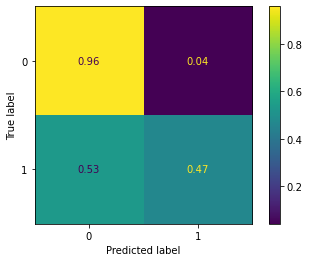

In [11]:
plot_confusion_matrix(rf, X_test, y_test, normalize = 'true')  
plt.show()

Widać, że nasz klasyfikator dobrze sobie radzi z przewidzeniem, że następnego dnia nie będzie padać. Natomiast częściej sie myli niż przewiduje poprawnie, gdy następnego dnia pada deszcz (a wydaje się, że poprawne przewidywanie takich dni jest ważniejsze).

## Logistic Regression

In [12]:
lr = LogisticRegression(random_state = 42, C = 0.9, max_iter = 1000)
lr.fit(X_train, y_train)
scores['lr'] = report(lr, X_test, y_test)

In [13]:
for k, v in scores['lr'].items():
    n = 15 - len(k)
    print(f'{k}: {v*100 : {n}.2f}')

accuracy:   85.51
precision:  80.99
recall:     74.02
f1-score:   76.57


W porównaniu z RandomForest uzyskaliśmy wyższe accuracy, ale już niższe precision. Wyniki dla Logistic Regression wydaję się jednak lepsze. Stwórzmy jeszcze tak jak poprzednio confusion matrix:

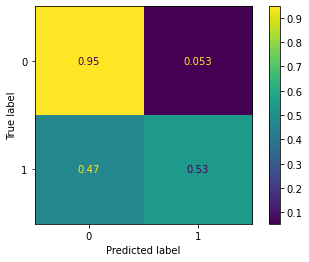

In [14]:
plot_confusion_matrix(lr, X_test, y_test, normalize = 'true')  
plt.show()

Znów okazuje się, że przewidywanie wartości '1' jest niełatwym zadaniem także dla LogisticRegression, ale rzeczywiście klasyfikator ten poradził sobie trochę lepiej od poprzedniego.

## XGBoost

In [15]:
xgb = XGBClassifier(random_state = 42, learning_rate = 0.07, booster = 'gbtree', max_depth = 11)
xgb.fit(X_train, y_train)
scores['xgb'] = report(xgb, X_test, y_test)

[13:09:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
for k, v in scores['xgb'].items():
    n = 15 - len(k)
    print(f'{k}: {v*100 : {n}.2f}')

accuracy:   85.84
precision:  81.19
recall:     75.14
f1-score:   77.46


Otrzymane wyniki wyglądają jak najlepsze do tej pory, ale jeszcze zestawimy wszystkie na jednym wykresie dla prostszego porównywania, na razie możemy standardowo utworzyć confusion matrix:

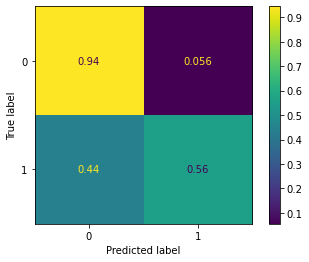

In [17]:
plot_confusion_matrix(xgb, X_test, y_test, normalize = 'true')  
plt.show()

## Wybór najlepszego klasyfikatora

Na początek możemy wyświetlić tabelę ze wszystkimi otrzymanymi wartościami.

In [18]:
df = pd.DataFrame(scores)
df

,rf,lr,xgb
accuracy,0.849935,0.855075,0.858384
precision,0.815799,0.809937,0.811902
recall,0.713090,0.740240,0.751358
f1-score,0.744601,0.765724,0.774612


Może się jednak przydać też stworzenie wykresu lepiej pokazującego porównanie otrzymanych ocen jakości klasyfikatorów.

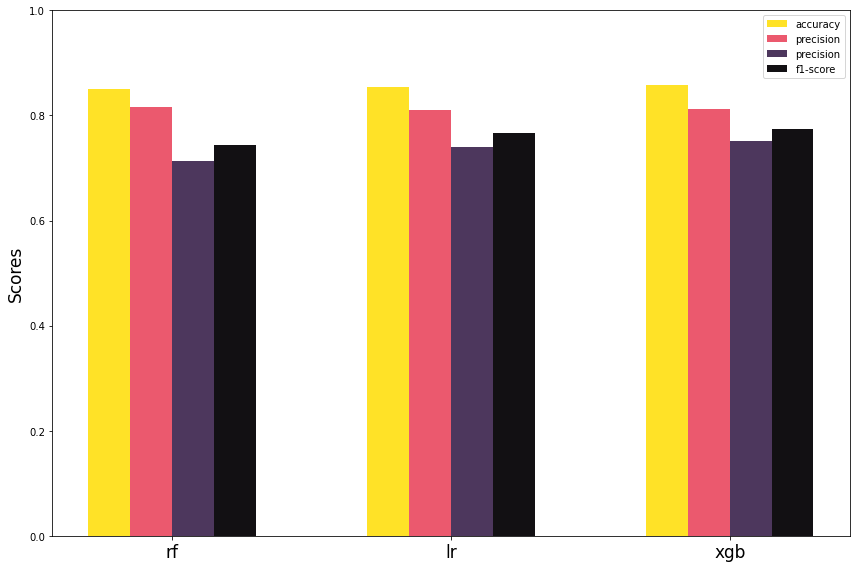

In [19]:
labels = list(scores.keys())
accuracy = list(df.loc['accuracy'])
precision = list(df.loc['precision'])
recall = list(df.loc['recall'])
f1_score = list(df.loc['f1-score'])

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize = (12, 8))
rects1 = ax.bar(x - 3 * width / 2, accuracy, width, color = '#ffe227', label = 'accuracy')
rects2 = ax.bar(x - width / 2, precision, width, color = '#eb596e', label = 'precision')
rects3 = ax.bar(x + width / 2, recall, width, color = '#4d375d', label = 'precision')
rects4 = ax.bar(x + 3 * width / 2, f1_score, width, color = '#121013', label = 'f1-score')

ax.set_ylabel('Scores', size = 17)
ax.set_xticks(x)
ax.set_xticklabels(labels, size = 17)
ax.legend()
ax.set_ylim([0, 1])
fig.tight_layout()

plt.show()

Można powiedzieć, że każdy z klasyfikatorów radzi sobie niemalże identycznie - niewielkie różnice można zauważyć w tabeli. XGBoost ma najwyższe accuracy oraz najwyższe f1-score (które uwzględia wewnątrz siebie i precision, i recall, dlatego jest najbardziej miarodajną oceną do porównywania pomiędzy modelami). Z tego względu wybrałbym właśnie ten klasyfiator.